In [1]:
import sys
sys.path.append('../80_Auswertungen/')
sys.path.append('../30_data_tools/')
from load_constants import load_colors
from helper import load_dotenv

import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [6]:
def get_alias_curve( sin_curve, freq, get_dots=False ):
    x_values = [x for x in range(0,sin_curve.shape[0],freq)]
    y_values = [sin_curve[x] for x in range(0,sin_curve.shape[0],freq)]

    if get_dots:
        return np.array([
            x_values,
            y_values
        ])
        
        out = []

        for x in range(sin_curve.shape[0]):
            if x in x_values:
                out.append(y_values[x_values.index(x)])
            else:
                out.append(0)
                
        return np.array(out)
    
    return np.interp([x for x in range(sin_curve.shape[0])], x_values, y_values)

In [2]:
COLORS = load_colors()

In [3]:
dotenv = load_dotenv()

In [7]:
wavelength = 26
sin_curve = np.arange(1000)
sin_curve = np.sin(2 * np.pi * sin_curve / wavelength)

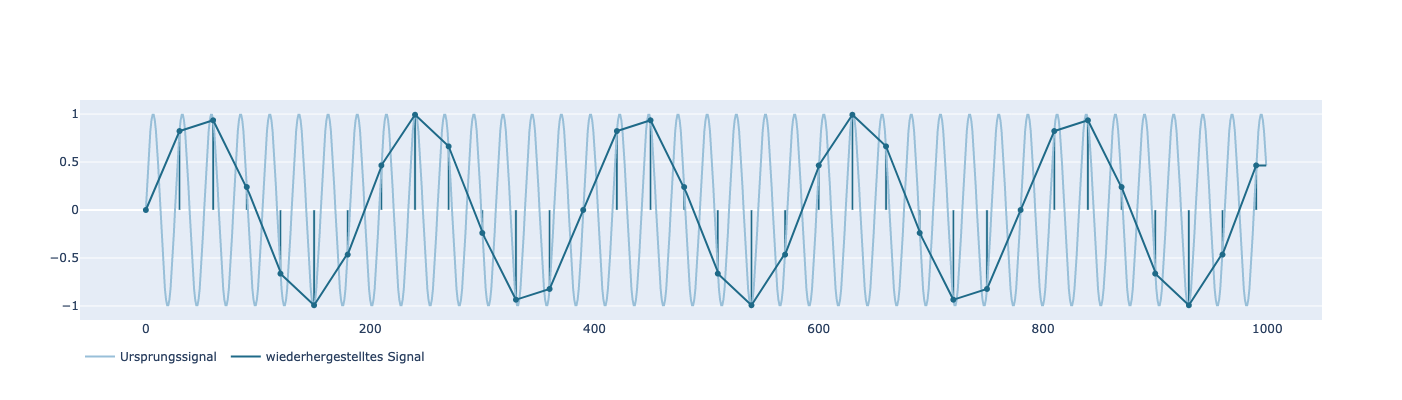

In [28]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=sin_curve,
    line=dict(color=COLORS['COLOR_SEQUENCE'][2]),
    mode="lines",
    name="Ursprungssignal"
))
fig.add_trace(go.Scatter(
    y=get_alias_curve( sin_curve, 30 ),
    line=dict(color=COLORS['COLOR_SEQUENCE'][0]),
    mode="lines",
    name="wiederhergestelltes Signal"
))

alias_data = get_alias_curve( sin_curve, 30, get_dots=True )
bar_chart = px.bar(
    x=alias_data[0,:],
    y=alias_data[1,:],
    color_discrete_sequence=[COLORS['COLOR_SEQUENCE'][0]]   
)
bar_chart.update_traces(width=2)
fig.add_trace(bar_chart.data[0])

fig.add_trace(
    px.scatter(
        x=alias_data[0,:],
        y=alias_data[1,:],
        color_discrete_sequence=[COLORS['COLOR_SEQUENCE'][0]]   
    ).data[0]
)
fig.update_layout(legend={'orientation':'h'})
fig.update_layout( autosize=False, width=1200, height=400, ) 

fig.write_image( dotenv['ATTACHMENT_DIR'] / 'moire_mathematic' / 'alias_effect.jpg' )
fig.write_image( dotenv['ATTACHMENT_DIR'] / 'moire_mathematic' / 'alias_effect.pdf' )

fig